# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
#
df.shape 

(1898, 9)

#### Observations:
There is 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Integer:order_id,customer_id,food preparation time and delivery_time
float:cost_of_the_order
object:restaurant_name,cuisine_type,day_of_the_week and rating(These are categorical data)


### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [30]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

# Use info() to print a concise summary of the DataFrame

df=df.astype({"restaurant_name":'category', "cuisine_type":'category',"day_of_the_week":'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations: The types of restaurant_name,cuisine_type and day_of_the_week is changed to category


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
# Write your code here
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
The min time is 20 mins,max time 35 and avg time is 27.37

### **Question 5:** How many orders are not rated? [1 mark]

In [16]:
(df['rating']=='Not given').sum()

736

There are 736 orders where the rating is not given

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

C:\Users\Viyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Viyan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Viyan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Viyan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Viyan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, fl

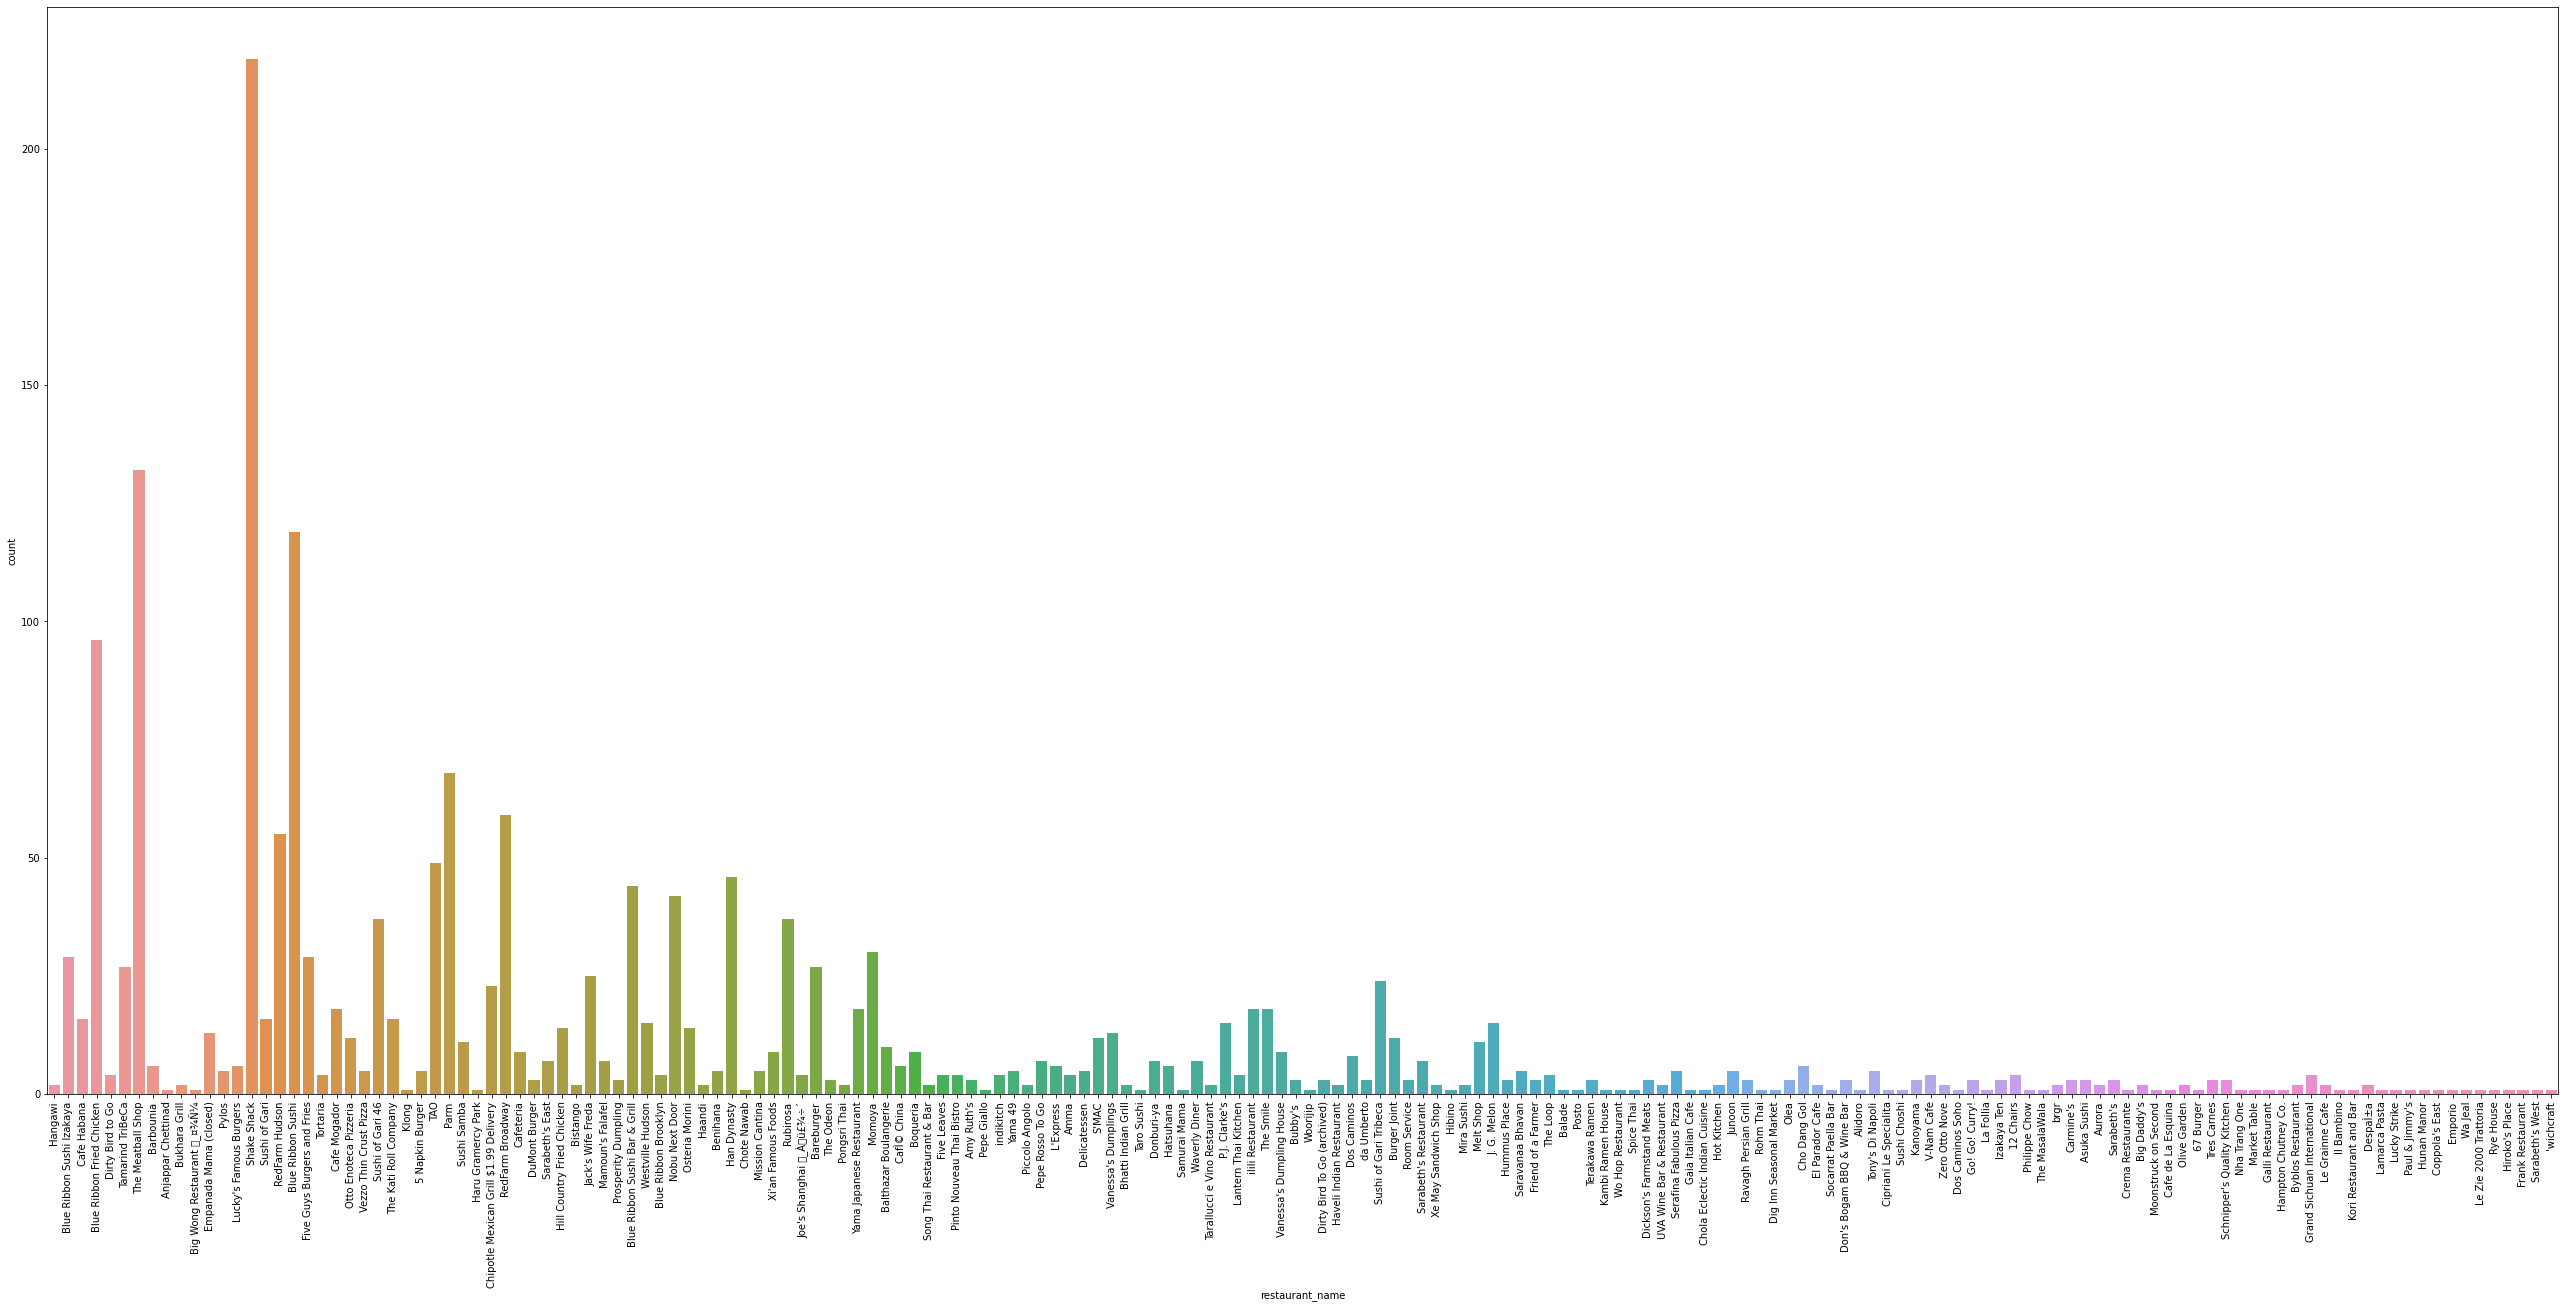

In [21]:
plt.figure(figsize=(45,20))
sns.countplot(df['restaurant_name']);

plt.xticks(rotation=90)

plt.show()

 From the countplot.I conclude that the restaurant with highest number of orders is shake shack.

C:\Users\Viyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


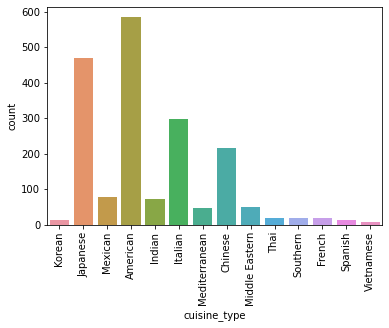

In [24]:
sns.countplot(df['cuisine_type']);
plt.xticks(rotation=90)
plt.show()

The first 3 highest ordered cuisine types are:American,Japanese and Italian respectively.

C:\Users\Viyan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


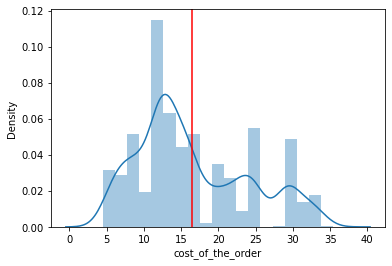

In [28]:
sns.distplot(df['cost_of_the_order']);
plt.axvline(x=df.cost_of_the_order.mean(),color='red') #code to plot the mean line

plt.show()

From the above univariant analysis we observe that the mean cost of order is approx. 17.

C:\Users\Viyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


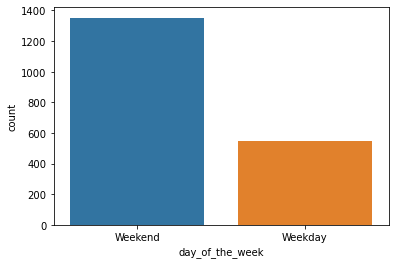

In [30]:
sns.countplot(df['day_of_the_week']);

The orders placed on Weekend is more than double of the orders placed on weekdays.

C:\Users\Viyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


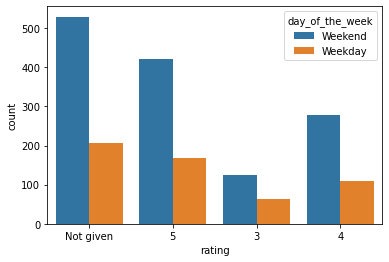

In [17]:
sns.countplot(df['rating'],hue=df['day_of_the_week']);

C:\Users\Viyan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


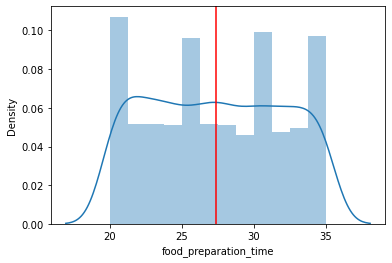

In [35]:
sns.distplot(df['food_preparation_time']);
plt.axvline(x=df.food_preparation_time.mean(),color='red')
plt.show()

We can observe that mean food preparation time is approx.17 mins

C:\Users\Viyan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


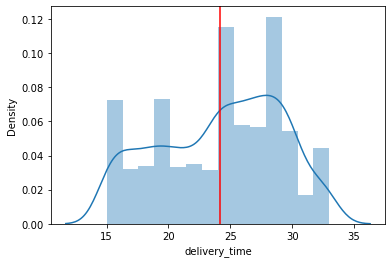

In [36]:
sns.distplot(df['delivery_time']);
plt.axvline(x=df.delivery_time.mean(),color='red')
plt.show()


We observe the mean food delevery time is approx.24 mins

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [42]:
df.groupby(df['restaurant_name'])['order_id'].count().sort_values(ascending=False)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: order_id, Length: 178, dtype: int64

# Top 5 restaurant with most number of orders:
The top 5 restaurants that recieved most orders is shake shack,The meatball shop,blue ribbon sushi,blue ribbon fried chicken
and parm.

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

C:\Users\Viyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


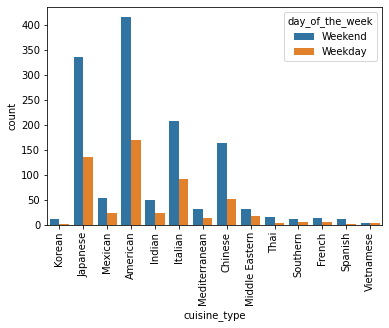

In [47]:
sns.countplot(df['cuisine_type'],hue=df['day_of_the_week']);
plt.xticks(rotation=90)
plt.show()

# Popular cuisine on weekend
The most popular cuisine on the weekends is American.

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [11]:
df_20=df[df['cost_of_the_order']>20] #Creating a series to store orders that are more than $20 in value
print('Number of orders that is more than $20',df_20.shape)
percent=(df_20.shape[0]/df.shape[0])*100
print('Percentage of order more than $ 20:',percent)

Number of orders that is more than $20 (555, 9)
Percentage of order more than $ 20: 29.24130663856691


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [12]:
print('Mean delivery time is:',df['delivery_time'].mean())


Mean delivery time is: 24.161749209694417


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [3]:
df_customer=(df.groupby(['customer_id'])['customer_id'].count().sort_values(ascending=False))#Group by customer id.Count the number of times the customer id occurs
df_customer.head() #Displays the top 5 customers based on the number of orders.

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
Name: customer_id, dtype: int64

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


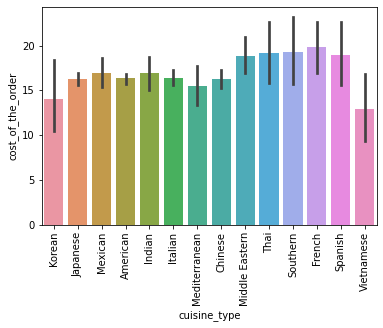

In [9]:
#cuisine_type VS cost_of_the_order
sns.barplot(data=df,x='cuisine_type',y='cost_of_the_order');
plt.xticks(rotation=90)
plt.show();

Vietnamese cuisine is least expensive.The most expensive order is the southern cuisine.The mean cost of the French cuisine
is the highest.Middle eastern,thai and southern cuisine has approx. the same mean cost of the order.

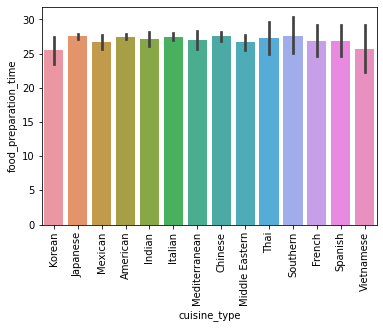

In [13]:
sns.barplot(data=df,x='cuisine_type',y='food_preparation_time');
plt.xticks(rotation=90)
plt.show();

Food preparation time is more or less the same for all cuisine types.I cannot conclude anything concrete from the above graph.

C:\Users\Viyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


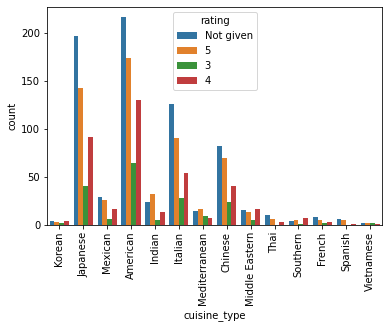

In [26]:
#Cuisine_type VS Rating

sns.countplot(df['cuisine_type'],hue=df['rating']);
plt.xticks(rotation=90)
plt.show();

Obsevation:
1.The top 2 fast moving cuisine types are American an Japanese.They receieved highest number of ratings aw well.
2.The top 4 fast moving cuisine types are American,Japanese,Italian and Chinese.The rest of the cuisne type dont account to that much of orders.This same pattern can be observed by the univariant analysis as well.

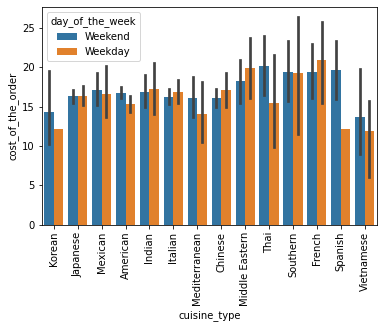

<Figure size 1080x720 with 0 Axes>

In [30]:
#cuisine_type vs cost
sns.barplot(data=df,x='cuisine_type',y='cost_of_the_order',hue='day_of_the_week');
plt.xticks(rotation=90)
plt.figure(figsize=(15,10))

plt.show();

# The following observation are made:

1.The mean cost of Spanish cuisine of weekday is approx.12 and on weekends the mean cost is approx.19. The gap in the cost may be due to variation in cost or the size of the order.We need more data to conclude correctly.

2.Thai the mean cost of order is approx.15 on weekday and 20 on weekend.

I can conclude from this that Thai and Spanish cuisine raise the food prices on weekends.

3.Japanese,Indian,southern and Mexican have aprox.the same amount of business in weekday and weekend.
    

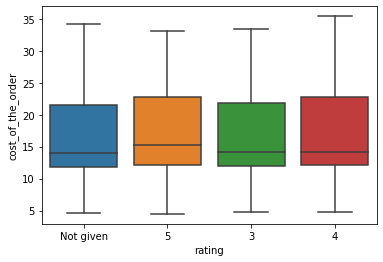

In [9]:
#rating  vs cost_of_the_order
sns.boxplot(data=df,y='cost_of_the_order',x='rating');


Obsevation:

1.The mean cost of the order that has receieved rating 5 is approx.16

2.The mean cost of the order that has not receieved rating,rating 4 and rating 3 are all 15. 

From this I conclude that there is no viable co-relation between rating and cost of the order.
    


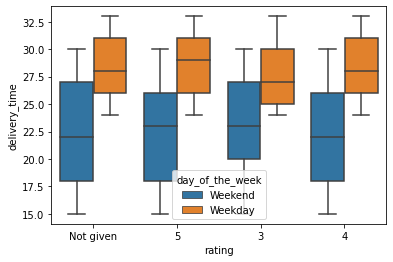

In [19]:
#Rating vs Delivery time
sns.boxplot(data=df,y='delivery_time',x='rating',hue='day_of_the_week');

Observations:
1.We can conclude that mean of weekend delivery time is much lesser than mean of weekday delivery time.We can observe big 
boxes for weekend this proves that more business is happening in the weekends.
2.No observation of strong corelation of rating and delivery time can be made.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

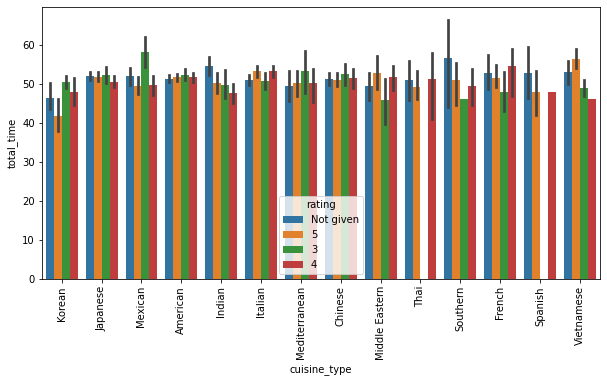

In [27]:
#cuisine Vs preparation time and rating
df1=df.copy()
df1['total_time']=df1['delivery_time']+df1['food_preparation_time']
plt.figure(figsize=(10,5))
sns.barplot(data=df1,x='cuisine_type',y='total_time',hue='rating');
plt.xticks(rotation=90)

Observations:1.For Indian,thai,southern and spanish cuisines the mean total time is slightlyhigher for the orders that has not received any ratings.This trend is not seen in other cuisine.The total time has a corelation with rating only for these 4 cuisine types.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

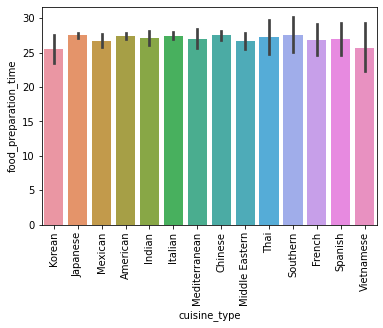

In [29]:
sns.barplot(data=df,x='cuisine_type',y='food_preparation_time');
plt.xticks(rotation=90)

All the cuisines have a mean preparation time of 26 to 28 mins.

<AxesSubplot:>

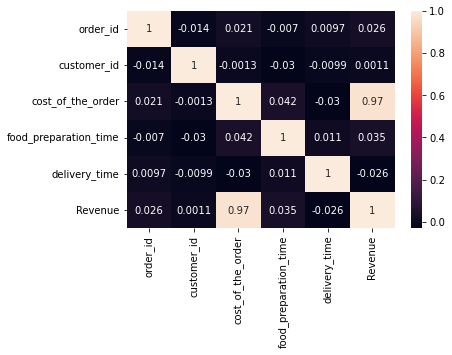

In [38]:
#Heatmap
sns.heatmap(df.corr(),annot=True)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [19]:
df_rated = df[df['rating'] != 'Not given'].copy()#Just leaving the non-rated rows.

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [21]:
#Creating a dataframe called avg_rating to get the mean rating for all the restaurants.
avg_rating = df_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating.head(10)


,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
5,Socarrat Paella Bar,5.0
6,DespaÌ±a,5.0
7,Dig Inn Seasonal Market,5.0
8,Saravanaa Bhavan,5.0
9,Donburi-ya,5.0


In [65]:
#Making a data frame with names of restaurants that has more than 50 ratings.
rest_names=df_rating_count[df_rating_count['rating']>50]['restaurant_name']
rest_names

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [66]:

avg_rating[avg_rating['restaurant_name'].isin(rest_names)].head(25)

,restaurant_name,rating
66,The Meatball Shop,4.511905
89,Blue Ribbon Fried Chicken,4.328125
93,Shake Shack,4.278195
101,Blue Ribbon Sushi,4.219178


The promotional offer will be given to The meatball shop,Blueribbon fried chicken,shake shack.blue ribbon sushi.

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [32]:

df_20=df[df['cost_of_the_order']>20].sum()
df_15=df[df['cost_of_the_order'].between(5, 20)].sum()
total_15=df_15['cost_of_the_order']

total=df_20['cost_of_the_order']
print('Totat amount > 20',total)
print('Total amount in range 15-20 :',total_15)
revenue=(total*0.25)+(total_15*0.15)
print('Total revunue generated:',revenue)


Totat amount > 20 14754.91
Total amount in range 15-20 : 16517.170000000002
Total revunue generated: 6166.303


I have totalled the total cost above 20 and the calculated the revenue.Then calculated the sum of the cost in range of 5 to 20 and calculated the revenue then calculated the total revenue.

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [46]:
df['total_time']=df['food_preparation_time']+df['delivery_time']
print(df.head())
df_time=df[df['total_time']>60]
percent=(df_time.shape[0]/df.shape[0])*100
print('Percent of delivey which takes longer than 60 mins',round(percent,2))
      



   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  Revenue  total_time  
0             20   7.6875          45  
1             23   1.8120          48  
2             28   1.8345 

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

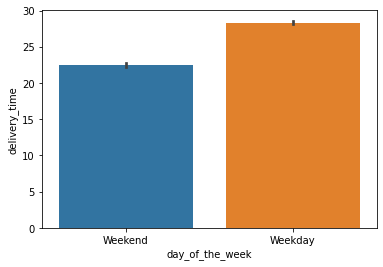

In [62]:
sns.barplot(data=df,x='day_of_the_week',y='delivery_time');


In weekend the delivery time is approx 22.5 mins.In weekdays the delivery time is approx 10 mins more than weekend.

#### Observations:


### Conclusion and Recommendations

# Analysing the top rated restaurants that has atleast 10 ratings.

In [26]:
#Calulating the average rating
avg_rating1 = df_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating1.head(10)


,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
5,Socarrat Paella Bar,5.0
6,DespaÌ±a,5.0
7,Dig Inn Seasonal Market,5.0
8,Saravanaa Bhavan,5.0
9,Donburi-ya,5.0


In [27]:
#Sorting the restaurants that has receieved more than 10 ratings.
rest_names1=df_rating_count[df_rating_count['rating']>10]['restaurant_name']
rest_names1

0                               Shake Shack
1                         The Meatball Shop
2                         Blue Ribbon Sushi
3                 Blue Ribbon Fried Chicken
4                          RedFarm Broadway
5                                      Parm
6                            RedFarm Hudson
7                                       TAO
8                                  Rubirosa
9                            Nobu Next Door
10                              Han Dynasty
11                                   Momoya
12            Blue Ribbon Sushi Bar & Grill
13                         Tamarind TriBeCa
14                        Jack's Wife Freda
15                Blue Ribbon Sushi Izakaya
16              Five Guys Burgers and Fries
17                         Sushi of Gari 46
18                               Bareburger
19    Chipotle Mexican Grill $1.99 Delivery
20                             Cafe Mogador
21                         ilili Restaurant
22                    Sushi of G

In [29]:
#Getting the names of restaurants that are highest rated with more that received more than 10 ratings.
avg_rating1[avg_rating1['restaurant_name'].isin(rest_names1)].head(25)

,restaurant_name,rating
61,Sushi of Gari Tribeca,4.615385
63,Blue Ribbon Sushi Bar & Grill,4.590909
64,Five Guys Burgers and Fries,4.555556
66,The Meatball Shop,4.511905
77,Han Dynasty,4.434783
78,The Smile,4.416667
79,J. G. Melon,4.416667
80,Tamarind TriBeCa,4.400000
81,Hill Country Fried Chicken,4.363636
82,TAO,4.357143


# Analysing the orders placed by 1st 5 customers who placed the most number of orders.

In [13]:
#Getting more information on the orders placed by first 5 customers.
df[df['customer_id']==52832]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
247,1478179,52832,Han Dynasty,Chinese,12.23,Weekend,3,33,27
272,1477314,52832,ilili Restaurant,Middle Eastern,9.46,Weekday,4,25,25
517,1476916,52832,Dickson's Farmstand Meats,American,15.72,Weekend,4,23,28
526,1478160,52832,Donburi-ya,Japanese,15.86,Weekday,5,28,28
632,1478265,52832,Dos Caminos,Mexican,16.06,Weekend,Not given,35,19
670,1477302,52832,Don's Bogam BBQ & Wine Bar,Korean,12.23,Weekend,Not given,32,20
855,1477041,52832,Junoon,Indian,25.17,Weekday,Not given,23,24
1039,1477013,52832,Donburi-ya,Japanese,8.01,Weekday,5,30,30
1070,1476828,52832,Donburi-ya,Japanese,6.64,Weekday,Not given,21,29
1105,1478245,52832,Junoon,Indian,29.49,Weekend,5,23,17


In [14]:
df[df['customer_id']==47440]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
264,1477909,47440,Blue Ribbon Fried Chicken,American,12.18,Weekend,Not given,31,23
398,1478120,47440,Blue Ribbon Fried Chicken,American,8.10,Weekend,Not given,33,22
579,1477178,47440,Bareburger,American,24.20,Weekend,4,23,23
674,1476982,47440,Bareburger,American,8.73,Weekend,5,21,19
778,1477481,47440,Bareburger,American,25.22,Weekday,3,31,27
807,1477594,47440,Bareburger,American,12.18,Weekday,3,25,24
824,1476854,47440,Blue Ribbon Fried Chicken,American,6.45,Weekend,4,30,24
1306,1476559,47440,Bareburger,American,15.57,Weekday,4,24,28
1359,1477903,47440,Bareburger,American,16.25,Weekend,Not given,32,28
1811,1477664,47440,Blue Ribbon Fried Chicken,American,29.30,Weekend,4,28,16


In [15]:
df[df['customer_id']==83287]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
103,1476564,83287,Five Guys Burgers and Fries,American,24.30,Weekend,5,30,20
663,1476673,83287,Blue Ribbon Sushi Izakaya,Japanese,9.51,Weekend,Not given,35,21
928,1476767,83287,Blue Ribbon Sushi Izakaya,Japanese,18.24,Weekend,5,32,22
1004,1477453,83287,Shake Shack,American,9.41,Weekend,5,22,20
1018,1478193,83287,Five Guys Burgers and Fries,American,16.01,Weekend,Not given,27,19
1091,1476812,83287,Shake Shack,American,9.02,Weekday,4,23,27
1310,1477358,83287,Boqueria,Spanish,14.50,Weekend,Not given,35,29
1465,1477258,83287,Blue Ribbon Sushi Izakaya,Japanese,29.10,Weekend,Not given,32,26
1617,1477628,83287,Blue Ribbon Sushi Izakaya,Japanese,9.22,Weekend,Not given,28,15


In [22]:
df[df['customer_id']==250494]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
20,1478296,250494,Five Guys Burgers and Fries,American,24.20,Weekend,4,21,24
144,1478269,250494,The Meatball Shop,Italian,11.16,Weekday,5,22,28
195,1477004,250494,Five Guys Burgers and Fries,American,33.03,Weekend,5,29,15
295,1478324,250494,Blue Ribbon Fried Chicken,American,29.10,Weekend,4,21,22
298,1476728,250494,Bubby's,American,24.25,Weekend,Not given,34,28
844,1476971,250494,Parm,Italian,28.57,Weekday,5,22,32
1371,1478385,250494,Blue Ribbon Fried Chicken,American,21.34,Weekend,5,28,21
1388,1478110,250494,Shake Shack,American,12.18,Weekend,Not given,23,16


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

# Analysis

1.When analysing the data of most ordered customer id's.We can observe that the customers have been ordering from the same restaurants repeatedly.The various reasons for this can be:Favourite place,offers or coupons from the restaurants.

2.Customers mostly order from 2 or 3 personal favorite cuisines.The company has decided to offer promotions for regular customers,this would probably increase the sales of their personal favorite restaurants.

3.I would suggest the business team to promote the customers to give more rating by offering a small promotion.This will give more data for analysing the favorite restaurants more accurately.There are more than 700+ orders that did not receive any rating.

4.More orders were placed on the weekends.

5.The delivery time on weekends is approx. 10 mins lesser than the delivery time on weekdays,inspite of having more orders.This might be due to the availability of more resources on weekends than on weekdays.
  
6.The top 3 cuisines are American,Japanese and Italian.This does not change for weekend and weekdays.


#  Feedback on promotional offers:
  

The company is offering 2 different promotional offers.

  1.Promotional offer for 1st 5 customers with highest number of orders placed.-> As we observed that that customers order repeatedly from the same restaurants.Using this promotional offer they will place more orders from their personal favorites.
  
  2.Promotional offer for 1st 5 best rated restaurants that has more than 50 rating.While analysing the 2 promotional offers both the promotional offers will be benificial in increasing more business for the following restaurants:Meat ball shop,Blue ribbon fried chicken,shake shack and blue ribbion Sushi.
  
  Instead we can the alter the 2nd promotional offer by offering the promotions to best rated restaurants that has receieved more than 10 ratings.This promotion will cover more number of restaurants. By that way there is possibility of people having many other personal favorites.Which will improve the business accross all the cuisines.


# #Corelation data:
  


From the heatmap we can conclude that delivery time or food preparation time has no significant corelation to the rating.Therefore the rating is purely based on quality and taste.